1. Import python packages 
2. Load Dataset 
3. Pre-Processing
4. EDA
5. Select (input/output data) 
6. Split data (train / test) 
7. Select ML Alg. 
8. Create ML Model 
9. Train the ML model 
10. Test the ML model 
11. Evaluate the model 

In [7]:
Input ----> Process ----> output 

ML : 
    input
input ----->
                ----> ML Model ----> output
output ---->                            |
   ^
   |                                    |
    -------------------------------------

SyntaxError: invalid syntax (3000265899.py, line 1)

In [8]:
import pandas as pd 

In [9]:
df = pd.read_csv('c:/Users/RAMAR BOSE/Downloads/reachingtime.csv')

In [10]:
df.head()

,Speed(KM/H),ReachingTime(Minitues)
0,2,68
1,3,67
2,4,66
3,5,65
4,6,64


In [11]:
# Pre-Processing (cleaning the data)

In [12]:
df.shape

(244, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Speed(KM/H)             244 non-null    int64
 1   ReachingTime(Minitues)  244 non-null    int64
dtypes: int64(2)
memory usage: 3.9 KB


In [14]:
df.isnull().sum()

Speed(KM/H)               0
ReachingTime(Minitues)    0
dtype: int64

In [15]:
df['ReachingTime(Minitues)'].unique()

array([68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52,
       51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35,
       34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11, 10], dtype=int64)

In [16]:
#EDA 

array([[<Axes: title={'center': 'Speed(KM/H)'}>,
        <Axes: title={'center': 'ReachingTime(Minitues)'}>]], dtype=object)

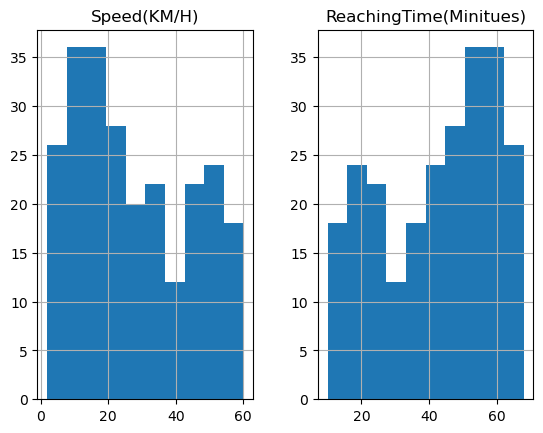

In [17]:
df.hist()

<Axes: >

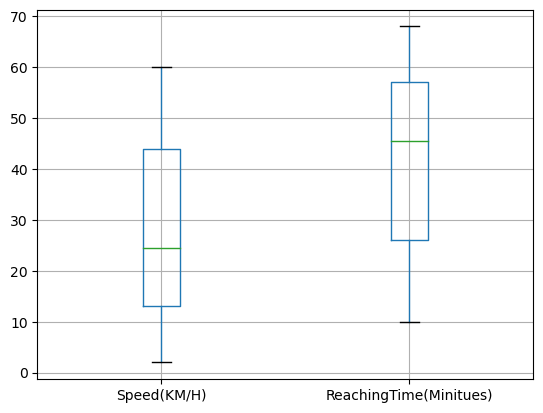

In [18]:
df.boxplot()

In [19]:
df.describe()

,Speed(KM/H),ReachingTime(Minitues)
count,244.000000,244.000000
mean,27.663934,42.336066
std,16.851621,16.851621
min,2.000000,10.000000
25%,13.000000,26.000000
50%,24.500000,45.500000
75%,44.000000,57.000000
max,60.000000,68.000000


In [20]:
X = df['Speed(KM/H)']
y = df['ReachingTime(Minitues)']

In [21]:
# split the data (training/testing ) 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=7)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(195,)
(49,)
(195,)
(49,)


In [23]:
X_train.head()

66     14
208    34
193    19
77     25
96     52
Name: Speed(KM/H), dtype: int64

In [24]:
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

In [25]:
#Select Alg.  
from sklearn.linear_model import LinearRegression

In [26]:
#Create ML model for LinearRegression 
lrmodel = LinearRegression()

In [27]:
#Train the model 
lrmodel.fit(X_train,y_train)

LinearRegression()

In [28]:
X_test = X_test.values.reshape(-1,1)

In [29]:
#predict 

lrmodel_pred = lrmodel.predict(X_test)

In [30]:
lrmodel_pred

array([[42.],
       [61.],
       [65.],
       [60.],
       [13.],
       [45.],
       [20.],
       [26.],
       [50.],
       [18.],
       [19.],
       [40.],
       [44.],
       [10.],
       [41.],
       [46.],
       [26.],
       [50.],
       [57.],
       [49.],
       [66.],
       [64.],
       [29.],
       [66.],
       [30.],
       [62.],
       [38.],
       [37.],
       [68.],
       [61.],
       [44.],
       [62.],
       [61.],
       [15.],
       [62.],
       [57.],
       [60.],
       [48.],
       [41.],
       [35.],
       [13.],
       [16.],
       [11.],
       [21.],
       [23.],
       [24.],
       [22.],
       [51.],
       [32.]])

In [32]:
print(lrmodel.intercept_, lrmodel.coef_, lrmodel.score(X_test, lrmodel_pred))

[70.] [[-1.]] 1.0


In [34]:
y_pred = lrmodel.intercept_ + lrmodel.coef_ * X_test
print(f"predicted response:\n{y_pred}")

predicted response:
[[42.]
 [61.]
 [65.]
 [60.]
 [13.]
 [45.]
 [20.]
 [26.]
 [50.]
 [18.]
 [19.]
 [40.]
 [44.]
 [10.]
 [41.]
 [46.]
 [26.]
 [50.]
 [57.]
 [49.]
 [66.]
 [64.]
 [29.]
 [66.]
 [30.]
 [62.]
 [38.]
 [37.]
 [68.]
 [61.]
 [44.]
 [62.]
 [61.]
 [15.]
 [62.]
 [57.]
 [60.]
 [48.]
 [41.]
 [35.]
 [13.]
 [16.]
 [11.]
 [21.]
 [23.]
 [24.]
 [22.]
 [51.]
 [32.]]


In [41]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

TypeError: 'int' object is not subscriptable

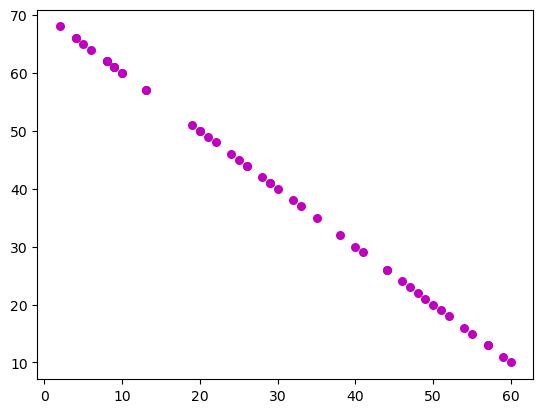

In [42]:
import matplotlib.pyplot as plt
plot_regression_line(X_test,y_pred,0)